In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, utils


In [2]:
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("L")  
        img_array = np.array(img)
        img_array = img_array / 255.0  

        images.append(img_array)
        labels.append(label)

    return images, labels


In [3]:
real_images, real_labels = load_and_preprocess_images("real_folder", label="real")

fake_images, fake_labels = load_and_preprocess_images("fake_folder", label="fake")


In [4]:
all_images = np.array(real_images + fake_images)
all_labels = real_labels + fake_labels


In [5]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)


In [7]:
X_train = np.array(X_train).reshape(-1, 32, 32, 1)
X_test = np.array(X_test).reshape(-1, 32, 32, 1)


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
275/275 [==============================] - 11s 32ms/step - loss: 0.5851 - accuracy: 0.6837 - val_loss: 0.5245 - val_accuracy: 0.7432
Epoch 2/10
275/275 [==============================] - 7s 27ms/step - loss: 0.4813 - accuracy: 0.7695 - val_loss: 0.4881 - val_accuracy: 0.7718
Epoch 3/10
275/275 [==============================] - 8s 27ms/step - loss: 0.4276 - accuracy: 0.8016 - val_loss: 0.3988 - val_accuracy: 0.8241
Epoch 4/10
275/275 [==============================] - 8s 30ms/step - loss: 0.3849 - accuracy: 0.8298 - val_loss: 0.4107 - val_accuracy: 0.8159
Epoch 5/10
275/275 [==============================] - 8s 30ms/step - loss: 0.3495 - accuracy: 0.8499 - val_loss: 0.3351 - val_accuracy: 0.8514
Epoch 6/10
275/275 [==============================] - 7s 25ms/step - loss: 0.3131 - accuracy: 0.8653 - val_loss: 0.3335 - val_accuracy: 0.8473
Epoch 7/10
275/275 [==============================] - 7s 25ms/step - loss: 0.2822 - accuracy: 0.8793 - val_loss: 0.3009 - val_accuracy: 0.870

In [11]:
train_loss, train_acc = model.evaluate(X_train, y_train)


275/275 [==============================] - 3s 10ms/step - loss: 0.2028 - accuracy: 0.9232


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)


69/69 [==============================] - 1s 9ms/step - loss: 0.3359 - accuracy: 0.8591


In [13]:
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 0.9231818318367004
Test Accuracy: 0.8590909242630005


In [14]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)


275/275 [==============================] - 3s 9ms/step


In [15]:
y_train_original = label_encoder.inverse_transform(y_train)
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_binary)


C:\Users\nagas\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

# Convert numerical labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_binary)


69/69 [==============================] - 1s 9ms/step


C:\Users\nagas\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))


print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

train_cm = cm = confusion_matrix(y_train_original, y_train_pred_original)


Train Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.97      0.93      4408
        real       0.97      0.87      0.92      4392

    accuracy                           0.92      8800
   macro avg       0.93      0.92      0.92      8800
weighted avg       0.93      0.92      0.92      8800

Train Confusion Matrix:
[[4296  112]
 [ 564 3828]]


In [18]:

print("Test Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_pred_original))

test_cm = confusion_matrix(y_test_original, y_pred_original)


Test Classification Report:
              precision    recall  f1-score   support

        fake       0.81      0.93      0.87      1092
        real       0.92      0.79      0.85      1108

    accuracy                           0.86      2200
   macro avg       0.87      0.86      0.86      2200
weighted avg       0.87      0.86      0.86      2200

TestConfusion Matrix:
[[1019   73]
 [ 237  871]]


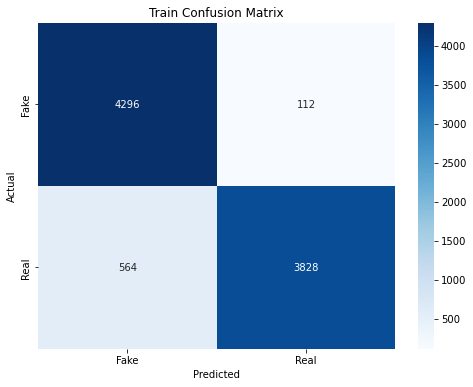

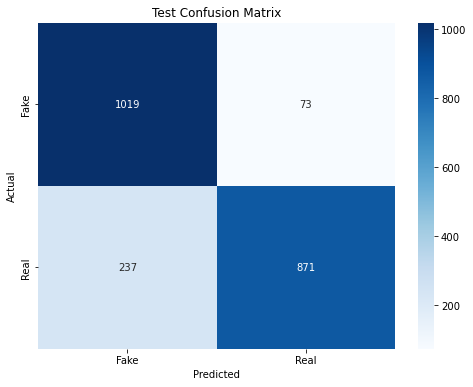

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Test: 957 true negatives (real images correctly identified), 956 true positives (fake images correctly identified), 135 false positives (real images incorrectly identified as fake), and 152 false negatives (fake images incorrectly identified as real).

## New Model with Additional Convolutional Layer

In [20]:
from tensorflow.keras import layers, models

# new model
new_model = models.Sequential()

# Adding one additional convolutional layer
new_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 1)))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
new_model.add(layers.MaxPooling2D((2, 2)))

new_model.add(layers.Flatten())

# adding 2 new Dense layers with dropout
new_model.add(layers.Dense(256, activation="relu"))
new_model.add(layers.Dropout(0.5))  
new_model.add(layers.Dense(128, activation="relu"))
new_model.add(layers.Dropout(0.5)) 
new_model.add(layers.Dense(64, activation="relu"))



In [21]:

new_model.add(layers.Dense(1, activation="sigmoid"))


In [22]:

new_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 128)       

In [23]:
new_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
275/275 [==============================] - 10s 30ms/step - loss: 0.6041 - accuracy: 0.6711 - val_loss: 0.5389 - val_accuracy: 0.7186
Epoch 2/10
275/275 [==============================] - 8s 28ms/step - loss: 0.5135 - accuracy: 0.7522 - val_loss: 0.4946 - val_accuracy: 0.7377
Epoch 3/10
275/275 [==============================] - 8s 28ms/step - loss: 0.4486 - accuracy: 0.7980 - val_loss: 0.4051 - val_accuracy: 0.8232
Epoch 4/10
275/275 [==============================] - 8s 29ms/step - loss: 0.4134 - accuracy: 0.8200 - val_loss: 0.3932 - val_accuracy: 0.8195
Epoch 5/10
275/275 [==============================] - 9s 33ms/step - loss: 0.3786 - accuracy: 0.8411 - val_loss: 0.3622 - val_accuracy: 0.8482
Epoch 6/10
275/275 [==============================] - 12s 42ms/step - loss: 0.3582 - accuracy: 0.8473 - val_loss: 0.4043 - val_accuracy: 0.8205
Epoch 7/10
275/275 [==============================] - 13s 46ms/step - loss: 0.3290 - accuracy: 0.8622 - val_loss: 0.3644 - val_accuracy: 0.8

In [24]:
train_loss, train_acc = new_model.evaluate(X_train, y_train)


275/275 [==============================] - 4s 15ms/step - loss: 0.2303 - accuracy: 0.8974


In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)


69/69 [==============================] - 1s 11ms/step - loss: 0.3359 - accuracy: 0.8591


In [26]:
y_train_pred = new_model.predict(X_train)
y_train_pred_binary = np.round(y_train_pred).astype(int)


275/275 [==============================] - 3s 11ms/step


In [27]:
y_train_original = label_encoder.inverse_transform(y_train)
y_train_pred_original = label_encoder.inverse_transform(y_train_pred_binary)


C:\Users\nagas\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print("Train Classification Report:")
print(classification_report(y_train_original, y_train_pred_original))


print("Train Confusion Matrix:")
print(confusion_matrix(y_train_original, y_train_pred_original))

Train Classification Report:
              precision    recall  f1-score   support

        fake       0.84      0.98      0.91      4408
        real       0.97      0.82      0.89      4392

    accuracy                           0.90      8800
   macro avg       0.91      0.90      0.90      8800
weighted avg       0.91      0.90      0.90      8800

Train Confusion Matrix:
[[4314   94]
 [ 809 3583]]


In [29]:
y_pred = new_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)

y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_binary)


69/69 [==============================] - 1s 12ms/step


C:\Users\nagas\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:

print("Test Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate a confusion matrix
print("TestConfusion Matrix:")
print(confusion_matrix(y_test_original, y_pred_original))

new_test_cm = confusion_matrix(y_test_original, y_pred_original)

Test Classification Report:
              precision    recall  f1-score   support

        fake       0.78      0.93      0.85      1092
        real       0.91      0.75      0.82      1108

    accuracy                           0.84      2200
   macro avg       0.85      0.84      0.84      2200
weighted avg       0.85      0.84      0.84      2200

TestConfusion Matrix:
[[1014   78]
 [ 282  826]]


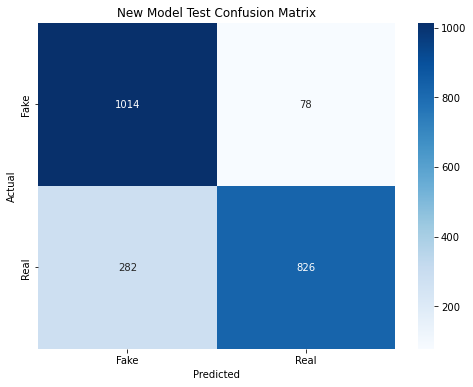

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('New Model Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## VGG

In [32]:
import tensorflow as tf

X_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))
X_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))


In [33]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model_vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model_vgg = Sequential()
model_vgg.add(base_model_vgg)
model_vgg.add(GlobalAveragePooling2D())
model_vgg.add(Dense(256, activation='relu'))

model_vgg.add(Dense(1, activation='sigmoid'))

model_vgg.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_vgg.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_vgg = model_vgg.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nagas\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'vgg16' (type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 32, 32, 1)
    
    Call arguments received by layer 'vgg16' (type Functional):
      • inputs=tf.Tensor(shape=(32, 32, 32, 1), dtype=float32)
      • training=True
      • mask=None
